In [69]:
import numpy as np
import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

Specifying paths to data

In [19]:
root_path = '/home/laura_g/data/CGG_data'
ge_test_dir = 'ge_test'
senti_test_dir = 'senti_test'
train_path = os.path.join(root_path, 'train')
json_path = os.path.join(train_path, 'training.json')

Load training data into dataframe

In [50]:
train_dirs = ['8x', '10x', 'gt']
fnames = []
train_dir_per_img = []
img_heights = []
img_widths = []
img_depths = []

for train_dir in train_dirs:
    fpath = os.path.join(train_path, train_dir)
    for fname in os.listdir(fpath):
        img = Image.open(os.path.join(fpath, fname))
        fnames.append(fname)
        train_dir_per_img.append(train_dir)
        img_heights.append(np.shape(img)[0])
        img_widths.append(np.shape(img)[1])
        img_depths.append(np.shape(img)[2])

data = {
    'fname': fnames,
    'dir': train_dir_per_img,
    'h': img_heights,
    'w': img_widths,
    'd': img_depths
}
        
train_dataset = pd.DataFrame(data=data)

count    3684.000000
mean      420.240228
std       434.279664
min        69.000000
25%       105.000000
50%       131.000000
75%      1046.000000
max      1068.000000
Name: h, dtype: float64
         fname dir     h     w  d
0     1319.png  8x   133   129  3
1     1320.png  8x   133   129  3
2     1321.png  8x   133   129  3
3     1322.png  8x   133   129  3
4     1323.png  8x   133   129  3
...        ...  ..   ...   ... ..
3679  3474.png  gt  1046  1055  3
3680  3475.png  gt  1046  1056  3
3681  3476.png  gt  1047  1056  3
3682  3477.png  gt  1046  1055  3
3683  3478.png  gt  1047  1055  3

[3684 rows x 5 columns]


In [98]:
train_8x_dataset = train_dataset[train_dataset['dir']=='8x']
train_10x_dataset = train_dataset[train_dataset['dir']=='10x']
train_gt_dataset = train_dataset[train_dataset['dir']=='gt']

print(train_gt_dataset['h'].describe())
print(train_gt_dataset['w'].describe())

print(train_10x_dataset['h'].describe())
print(train_10x_dataset['w'].describe())


count    1228.000000
mean     1029.928339
std        86.839132
min       697.000000
25%      1046.000000
50%      1049.000000
75%      1057.000000
max      1068.000000
Name: h, dtype: float64
count    1228.000000
mean     1026.767915
std        86.333874
min       693.000000
25%      1038.000000
50%      1052.000000
75%      1055.000000
max      1059.000000
Name: w, dtype: float64
count    1228.000000
mean      102.450326
std         8.740484
min        69.000000
25%       104.000000
50%       104.000000
75%       105.000000
max       106.000000
Name: h, dtype: float64
count    1228.000000
mean      102.174267
std         8.679135
min        69.000000
25%       103.000000
50%       105.000000
75%       105.000000
max       105.000000
Name: w, dtype: float64


/home/laura_g/data/CGG_data/train/10x/2529.png


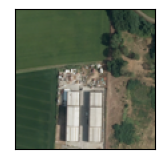

/home/laura_g/data/CGG_data/train/10x/2141.png


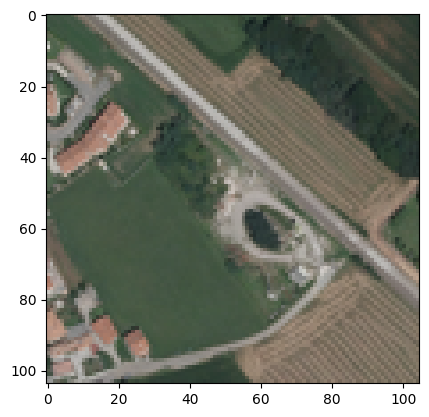

/home/laura_g/data/CGG_data/train/10x/3123.png


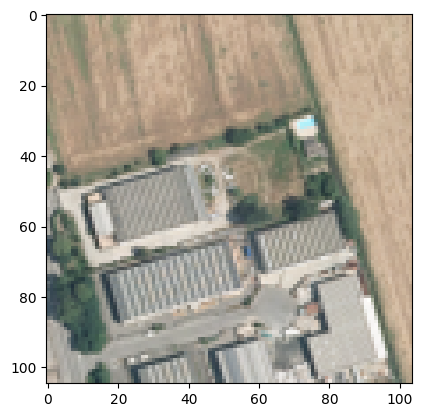

/home/laura_g/data/CGG_data/train/10x/3112.png


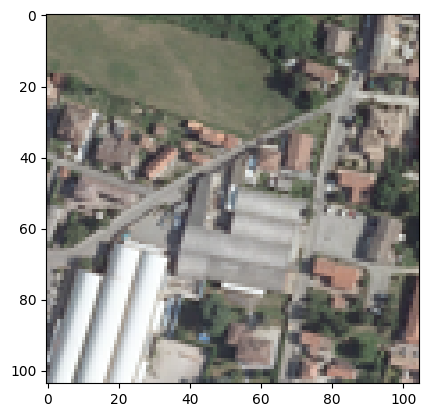

/home/laura_g/data/CGG_data/train/10x/2246.png


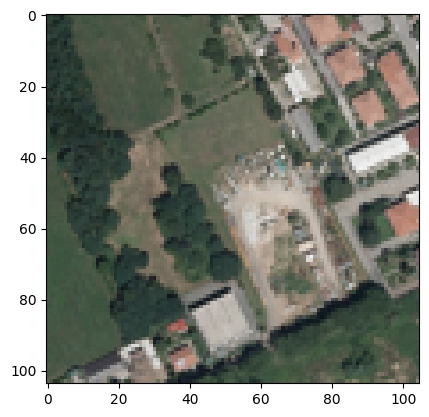

/home/laura_g/data/CGG_data/train/10x/3214.png


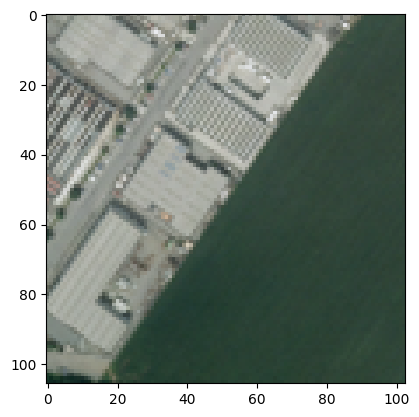

/home/laura_g/data/CGG_data/train/10x/2573.png


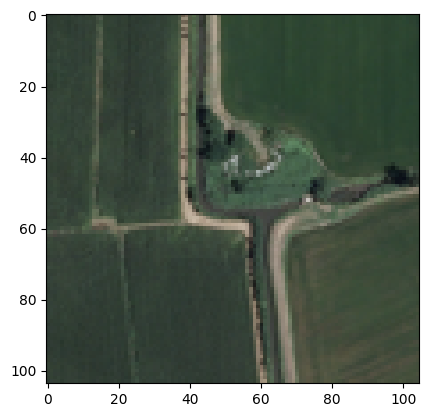

/home/laura_g/data/CGG_data/train/10x/2850.png


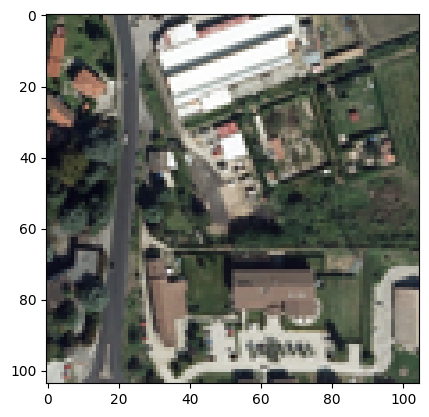

/home/laura_g/data/CGG_data/train/10x/2588.png


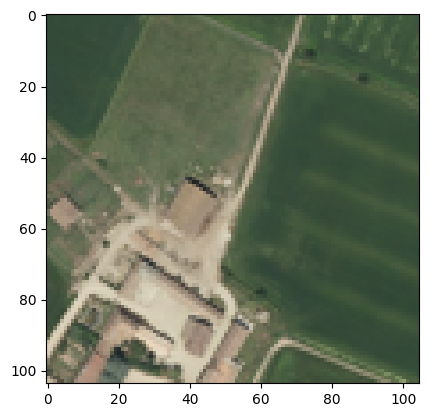

/home/laura_g/data/CGG_data/train/10x/2736.png


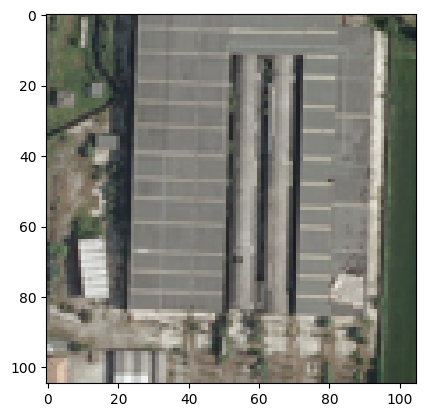

/home/laura_g/data/CGG_data/train/10x/2191.png


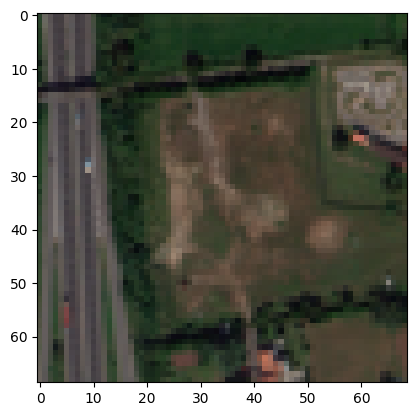

/home/laura_g/data/CGG_data/train/10x/3173.png


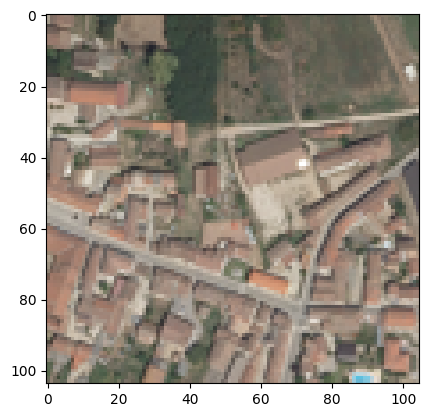

/home/laura_g/data/CGG_data/train/10x/2650.png


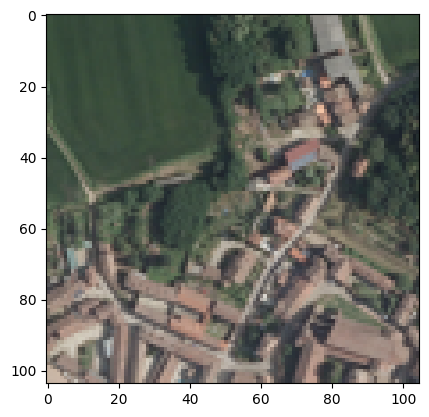

/home/laura_g/data/CGG_data/train/10x/3062.png


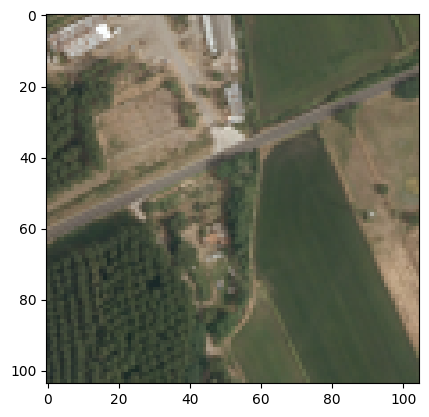

/home/laura_g/data/CGG_data/train/10x/2267.png


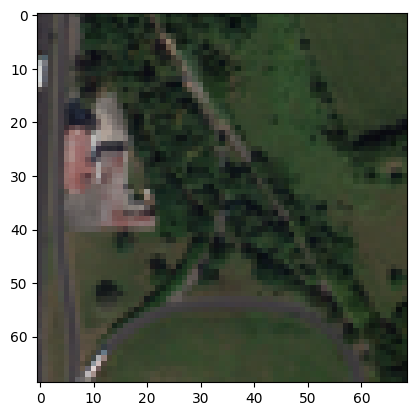

/home/laura_g/data/CGG_data/train/10x/3215.png


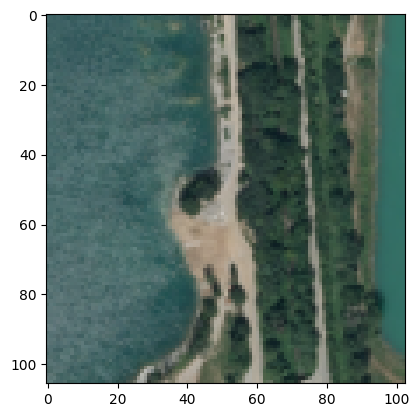

/home/laura_g/data/CGG_data/train/10x/3074.png


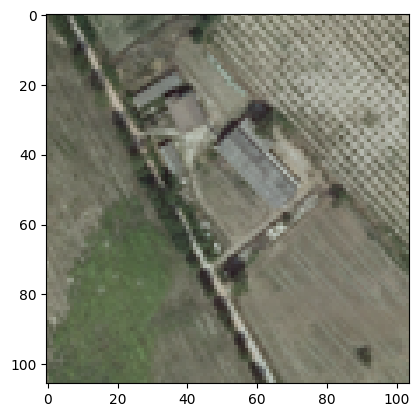

/home/laura_g/data/CGG_data/train/10x/2480.png


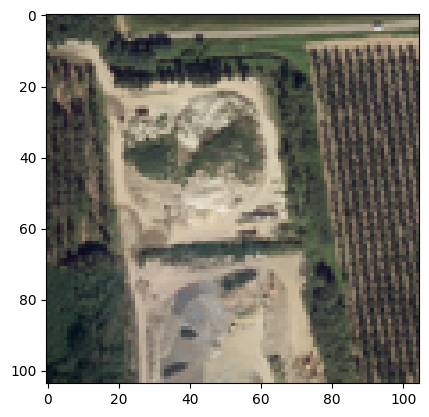

/home/laura_g/data/CGG_data/train/10x/3129.png


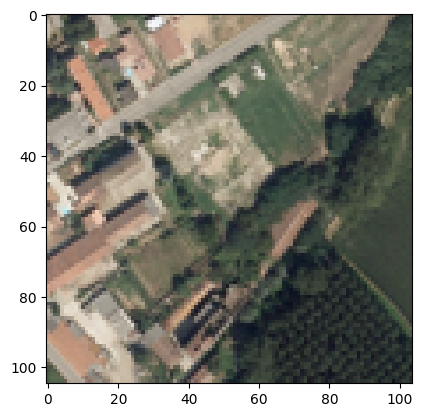

/home/laura_g/data/CGG_data/train/10x/3133.png


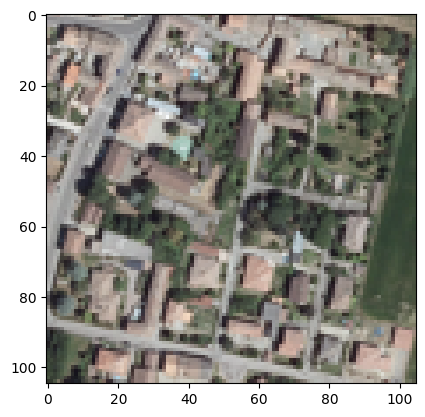

In [91]:
fig = plt.figure(figsize=(25, 4))
train_imgs = os.listdir(os.path.join(train_path, '10x'))
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    print(os.path.join(train_path, '10x', img))
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    im = Image.open(os.path.join(train_path, '10x', img))
    plt.imshow(im)
    plt.show()

Check which files in 10x are larger than gt:

In [58]:
def check_for_incorrectly_sized_pairs(fnames_small_imgs, fnames_big_imgs, scale_factor=10):
    incorrect_size_files = []
    for fname_small_img, fname_big_img in zip(fnames_small_imgs, fnames_big_imgs):
        small_img = Image.open(fname_small_img)
        big_img = Image.open(fname_big_img)
        if np.shape(big_img)[0] < np.shape(small_img)[0] or np.shape(big_img)[1] < np.shape(small_img)[1]:
            incorrect_size_files.append(fname_small_img)
    return incorrect_size_files

tenx_fnames = check_for_incorrectly_sized_pairs(ten_x_train_data_file_names, gt_train_data_file_names)
eightx_fnames = check_for_incorrectly_sized_pairs(eight_x_train_data_file_names, gt_train_data_file_names)
print(tenx_fnames)
print(eightx_fnames)